In [36]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy.optimize import minimize 
from sklearn.cluster import KMeans
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection

%matplotlib inline

In [37]:
def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    
def threshold_brightness(img):
    img_ = np.copy(img)
    img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
    img_ = cv2.GaussianBlur(img_,(5,5),0)
    
    ret,img_ = cv2.threshold(img_,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    return img_

def morph_transform(img, kernel_size=5):
    img_ = np.copy(img)
    # morphology transform
    kernel = np.ones((kernel_size, kernel_size),np.uint8)
    img_ = cv2.dilate(img_,kernel,iterations = 1)
    #img_ = cv2.erode(img_,kernel,iterations = 1)
    
    return img_

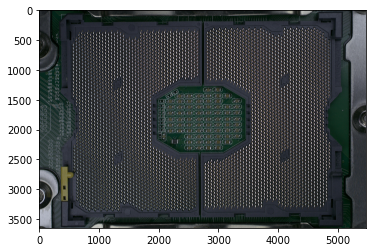

In [35]:
img = plt.imread('original.jpg', 0)
img_origin = np.copy(img)
plt.imshow(img)

In [29]:
img.shape, img.max()

((3648, 5472, 3), 255)

In [30]:
def match_tmpl(img_rgb, tmpl_path, threshold=.65):
    #img_origin = np.copy(img_rgb)
    print("test1~~~~~~~~~~~")
    img_tmpl = cv2.imread(tmpl_path, 0)
    img_tmpl = gaussian_blur(img_tmpl, kernel_size=5)
    img_tmpl = cv2.cvtColor(img_tmpl, cv2.COLOR_BGR2GRAY)    
    
    if len(img_rgb.shape)>2:
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    else:
        img_gray = img_rgb
    
    tmpl_w, tmpl_h = img_tmpl.shape[::-1]        
    print("test2~~~~~~~~~~~")

    res = cv2.matchTemplate(img_gray, img_tmpl, cv2.TM_CCOEFF_NORMED)
    #threshold = 0.65
    print("test3~~~~~~~~~~~")
    loc = np.where( res >= threshold)
    print("test4~~~~~~~~~~~")
    canvas_blk = np.zeros_like(img_rgb)
    print("test41~~~~~~~~~~~")
    for pt in zip(*loc[::-1]):
    #     cv2.rectangle(canvas_blk, pt, (pt[0] + w, pt[1] + h), (0,0,255), 1)
        cv2.circle(canvas_blk, pt, 2, (255,255,255), 1)
    #     cv2.arrowedLine(img_rgb, (pt[0], pt[1] + h), (pt[0] + w, pt[1]), (0,0,255), 1)
    
    # morphology transform
    #kernel = np.ones((35,35),np.uint8)
    #canvas_blk = cv2.dilate(canvas_blk,kernel,iterations = 1)
    #canvas_blk = cv2.erode(canvas_blk,kernel,iterations = 1)
    print("test5~~~~~~~~~~~")
    contours, _ = cv2.findContours(canvas_blk, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    pin_centers = []
    for contour in contours:
        pin_centers.append(np.squeeze(contour.mean(0).astype(int)))

#     pin_centers = [[pt[0], pt[1]] for pt in zip(*loc[::-1])]
        
    return pin_centers, tmpl_w, tmpl_h

In [32]:
# match pin area
area_locs, tmpl_w, tmpl_h = match_tmpl(img_origin, 'templ.png', threshold=.6)

# generate mask    
mask = np.zeros_like(img_origin)
#canvas_blk = np.copy(img_origin)
for loc in area_locs:        
    cv2.rectangle(mask, (loc[0], loc[1]), 
    (loc[0]+tmpl_w, loc[1]+tmpl_h), (255,255,255), -1)

# cv2.imwrite('./houston/result/mask.jpg', mask)

test1~~~~~~~~~~~


error: ignored

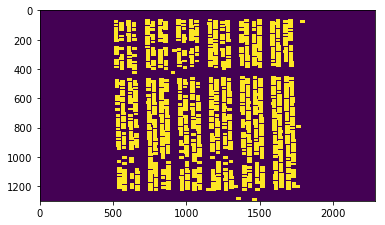

In [ ]:
plt.imshow(mask)

In [ ]:
# img_mask = cv2.imread('./detect_pin/Mask_for_Nanning/4.jpg',0)
# # img_mask = cv2.imread('./GUI/mask.jpg',0)
# print(img_mask.shape)
# plt.imshow(mask,'gray')

In [ ]:
img.shape, mask.shape

((1300, 2285), (1300, 2285))

In [ ]:
img_rgb = cv2.bitwise_and(img, img, mask=mask)

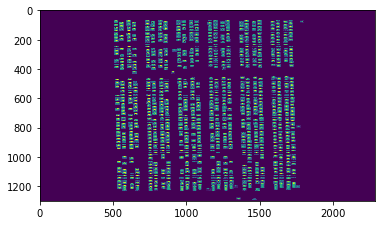

In [ ]:
plt.imshow(img_rgb)

In [ ]:
cv2.imwrite('result/masked.jpg', img_rgb)

True